In [3]:
import pandas as pd
import numpy as np

In [4]:
GMM_final=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/GMM_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/GMM_final_pass_3781881_1212807_114.csv"
]

final_power=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_final_pass_3781881_1212807_114.csv"
]

KMeans_final=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/KMeans_final_pass_3781904_1212859_74.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/KMeans_final_pass_3781881_1212807_114.csv"
]

# KMeans_final=[
#     "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_final_pass_3781904_1212859_74.csv",
#     "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l2_3781892_1212811/power_final_pass_3781892_1212811_114.csv",
#     "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_final_pass_3781881_1212807_114.csv"
# ]

In [5]:
df_GMMS=[pd.read_csv(x) for x in GMM_final]
df_KMeans=[pd.read_csv(x) for x in KMeans_final]
df_final_power=[pd.read_csv(x) for x in final_power]

In [6]:
df_final_power[0]

,Unnamed: 0,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6
0,0,2022-09-29T19:52:21.255000Z,1.704680,-0.870837,0.288584,2.000000,2.000000,2.000000,1.996500,1.390269
1,1,2022-09-29T19:52:21.383000Z,0.196282,-0.436264,0.084112,2.000000,1.278538,2.000000,-0.024033,0.098200
2,2,2022-09-29T19:52:21.511000Z,0.270246,0.773141,-0.324968,1.282935,0.022962,-0.072633,-0.035268,-0.480472
3,3,2022-09-29T19:52:21.639000Z,1.205430,1.225955,-0.084033,2.000000,1.236588,1.243213,0.657617,0.357872
4,4,2022-09-29T19:52:21.767000Z,0.746747,1.493676,-0.524764,1.767837,0.537377,0.203203,-0.126648,-0.299291
...,...,...,...,...,...,...,...,...,...,...
79,79,2022-09-29T19:52:31.367000Z,0.743676,1.190782,-0.568811,0.863448,0.123661,1.567258,0.411171,-0.164936
80,80,2022-09-29T19:52:31.495000Z,0.879386,1.244842,-0.518404,1.768954,-0.336578,-0.365463,-0.005538,0.679536
81,81,2022-09-29T19:52:31.623000Z,0.784231,1.119488,-0.326659,1.253453,1.269452,-0.325476,0.542297,0.122744
82,82,2022-09-29T19:52:31.751000Z,0.693955,1.096260,-0.589895,2.000000,0.104848,-0.449554,1.062495,-0.212485


In [7]:
def pass_change(df):
    try:
        df["prev"]=df["GMM"].shift(1)
        df["change"]=df.apply(lambda x: x["prev"]-x["GMM"],axis=1)
        df["pss_change"]=df.apply(lambda x: abs(x["change"]),axis=1)
    except:
        df["prev"]=df["K_Means"].shift(1)
        df["change"]=df.apply(lambda x: x["prev"]-x["K_Means"],axis=1)
        df["pss_change"]=df.apply(lambda x: abs(x["change"]),axis=1)
    return df

df_GMMS_c=[pass_change(df) for df in df_GMMS]
df_KMeans_c=[pass_change(df) for df in df_KMeans]


In [8]:
value_counts_GMM=[x["pss_change"].value_counts() for x in df_GMMS_c]
value_counts_GMM

[0.0    48
 1.0    26
 2.0     7
 3.0     2
 Name: pss_change, dtype: int64,
 0.0    43
 1.0    37
 2.0    11
 Name: pss_change, dtype: int64]

In [54]:
value_counts_GMM=[x["GMM"].value_counts() for x in df_GMMS_c]
value_counts_GMM

[2    55
 3    14
 4     8
 1     7
 Name: GMM, dtype: int64,
 3    40
 2    36
 1    11
 4     5
 Name: GMM, dtype: int64]

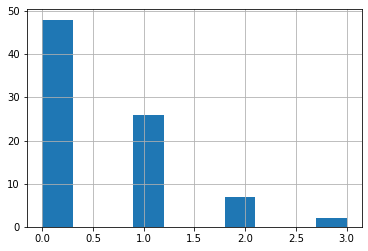

In [9]:
df_GMMS_c[0]["pss_change"].hist()

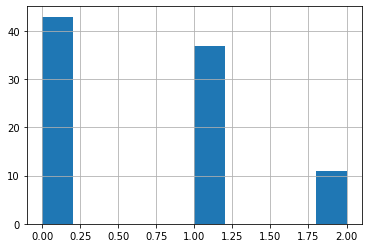

In [10]:
df_GMMS_c[1]["pss_change"].hist()

In [11]:
# df_GMMS_c[2]["pss_change"].hist()

In [12]:
df_unique_GMM = pd.DataFrame({'l1':[41,31,8,3],
                              'l2':[37,29,15,10],
                              'l3':[42,18,29,2]})
df_unique_GMM

,l1,l2,l3
0,41,37,42
1,31,29,18
2,8,15,29
3,3,10,2


In [13]:
value_counts_KMeans=[x["pss_change"].value_counts() for x in df_KMeans_c]
value_counts_KMeans

[0.0    48
 1.0    26
 2.0     7
 3.0     2
 Name: pss_change, dtype: int64,
 0.0    43
 1.0    37
 2.0    11
 Name: pss_change, dtype: int64]

In [ ]:
value_counts_KMeans=[x["K_Means"].value_counts() for x in df_KMeans_c]
value_counts_KMeans

In [53]:
value_counts_KMeans=[x["K_Means"].value_counts() for x in df_KMeans_c]
value_counts_KMeans

[2    55
 3    14
 4     8
 1     7
 Name: K_Means, dtype: int64,
 3    40
 2    36
 1    11
 4     5
 Name: K_Means, dtype: int64]

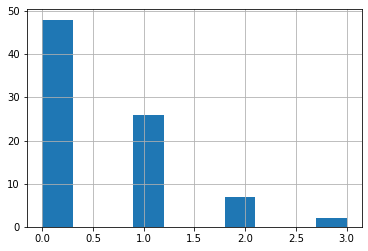

In [14]:
df_KMeans_c[0]["pss_change"].hist()

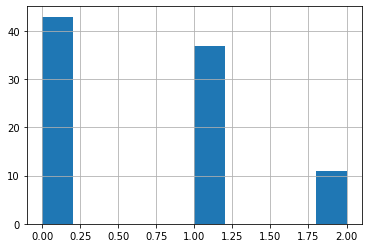

In [15]:
df_KMeans_c[1]["pss_change"].hist()

In [18]:
# df_KMeans_c[2]["pss_change"].hist()

In [19]:
df_unique_KMeans = pd.DataFrame({'l1':[44,9,26,4],
                              'l2':[39,35,16,1],
                              'l3':[31,34,25,1]})
df_unique_KMeans

,l1,l2,l3
0,44,39,31
1,9,35,34
2,26,16,25
3,4,1,1


In [25]:
GMM_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/GMM_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/GMM_first_pass_3781881_1212807_105.csv"
     ]

power_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_first_pass_3781881_1212807_105.csv"
     ]

KMeans_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/KMeans_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/KMeans_first_pass_3781881_1212807_105.csv"
]


In [26]:
df_GMMS_first=[pd.read_csv(x) for x in GMM_first]
df_KMeans_first=[pd.read_csv(x) for x in KMeans_first]
df_final_power_first=[pd.read_csv(x) for x in power_first]

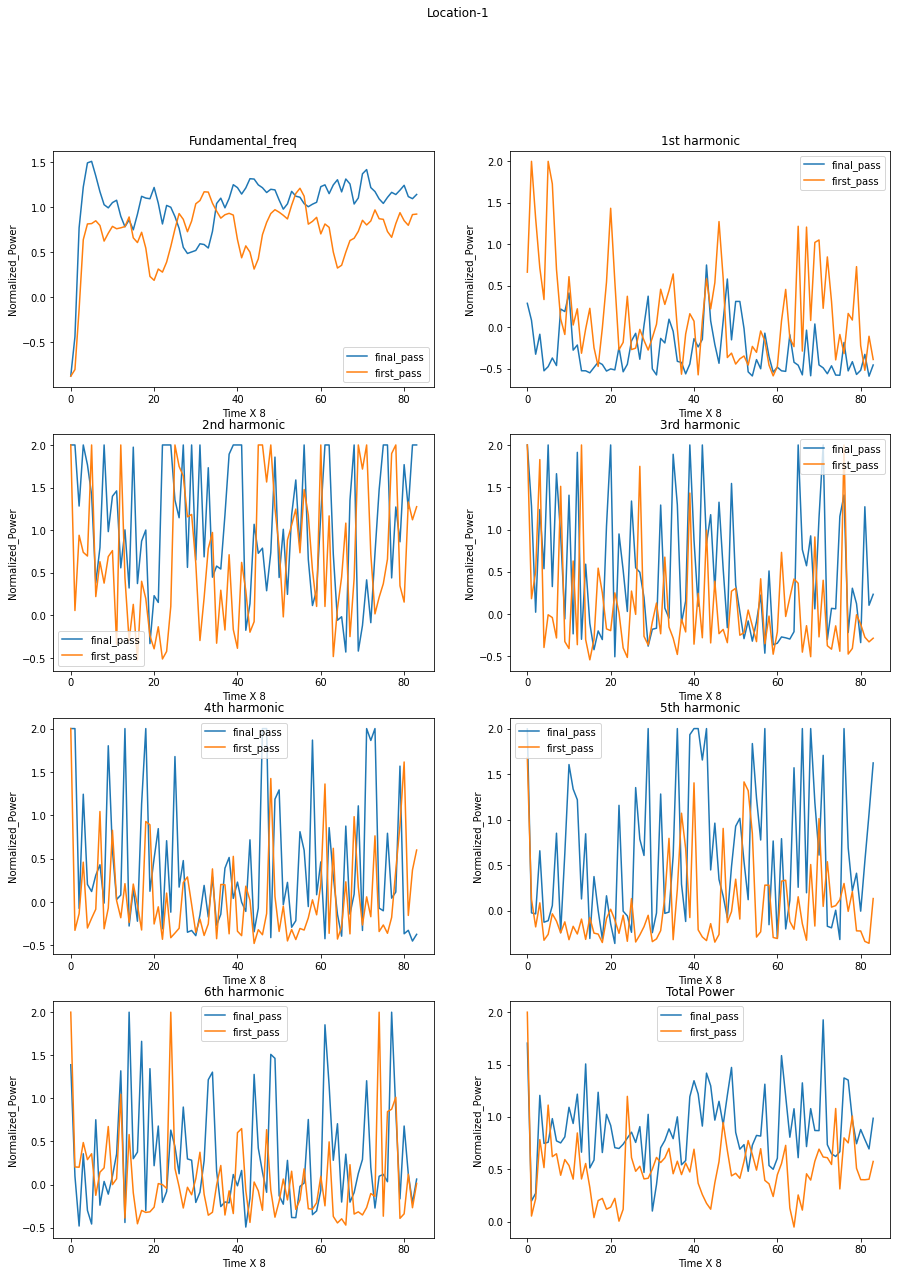

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle("Location-1")

df_final_power[0][["timestamp","p0"]].plot(ax=axes[0,0], label="l1")
df_final_power_first[0][["timestamp","p0"]].plot(ax=axes[0,0], label="l3")
axes[0,0].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p1"]].plot(ax=axes[0,1], label="l1")
df_final_power_first[0][["timestamp","p1"]].plot(ax=axes[0,1], label="l3")
axes[0,1].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p2"]].plot(ax=axes[1,0], label="l1")
df_final_power_first[0][["timestamp","p2"]].plot(ax=axes[1,0], label="l3")
axes[1,0].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p3"]].plot(ax=axes[1,1], label="l1")
df_final_power_first[0][["timestamp","p3"]].plot(ax=axes[1,1], label="l3")
axes[1,1].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p4"]].plot(ax=axes[2,0], label="l1")
df_final_power_first[0][["timestamp","p4"]].plot(ax=axes[2,0], label="l3")
axes[2,0].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p5"]].plot(ax=axes[2,1], label="l1")
df_final_power_first[0][["timestamp","p5"]].plot(ax=axes[2,1], label="l3")
axes[2,1].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","p6"]].plot(ax=axes[3,0], label="l1")
df_final_power_first[0][["timestamp","p6"]].plot(ax=axes[3,0], label="l3")
axes[3,0].legend(["final_pass", "first_pass"])
df_final_power[0][["timestamp","total_power"]].plot(ax=axes[3,1], label="l1")
df_final_power_first[0][["timestamp","total_power"]].plot(ax=axes[3,1], label="l3")
axes[3,1].legend(["final_pass", "first_pass"])

axes[0,0].set(title="Fundamental_freq",xlabel="Time X 8", ylabel="Normalized_Power")
axes[0,1].set(title="1st harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[1,0].set(title="2nd harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[1,1].set(title="3rd harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[2,0].set(title="4th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[2,1].set(title="5th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[3,0].set(title="6th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[3,1].set(title="Total Power",xlabel="Time X 8", ylabel="Normalized_Power")

fig.savefig("Location-1.png")

# fig.title("Normalized Powers in ")

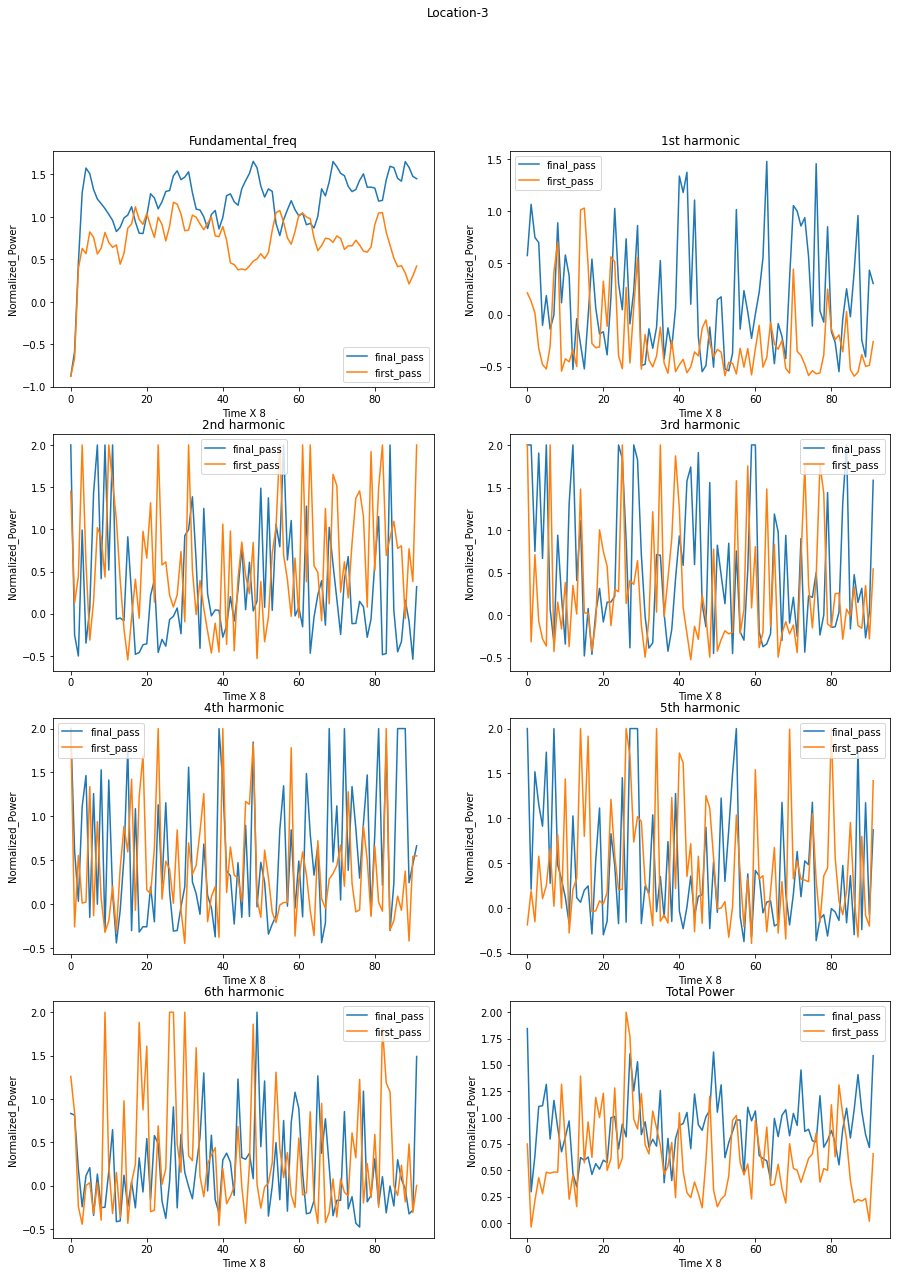

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle("Location-3")

df_final_power[1][["timestamp","p0"]].plot(ax=axes[0,0], label="l1")
df_final_power_first[1][["timestamp","p0"]].plot(ax=axes[0,0], label="l3")
axes[0,0].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p1"]].plot(ax=axes[0,1], label="l1")
df_final_power_first[1][["timestamp","p1"]].plot(ax=axes[0,1], label="l3")
axes[0,1].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p2"]].plot(ax=axes[1,0], label="l1")
df_final_power_first[1][["timestamp","p2"]].plot(ax=axes[1,0], label="l3")
axes[1,0].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p3"]].plot(ax=axes[1,1], label="l1")
df_final_power_first[1][["timestamp","p3"]].plot(ax=axes[1,1], label="l3")
axes[1,1].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p4"]].plot(ax=axes[2,0], label="l1")
df_final_power_first[1][["timestamp","p4"]].plot(ax=axes[2,0], label="l3")
axes[2,0].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p5"]].plot(ax=axes[2,1], label="l1")
df_final_power_first[1][["timestamp","p5"]].plot(ax=axes[2,1], label="l3")
axes[2,1].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","p6"]].plot(ax=axes[3,0], label="l1")
df_final_power_first[1][["timestamp","p6"]].plot(ax=axes[3,0], label="l3")
axes[3,0].legend(["final_pass", "first_pass"])
df_final_power[1][["timestamp","total_power"]].plot(ax=axes[3,1], label="l1")
df_final_power_first[1][["timestamp","total_power"]].plot(ax=axes[3,1], label="l3")
axes[3,1].legend(["final_pass", "first_pass"])

axes[0,0].set(title="Fundamental_freq",xlabel="Time X 8", ylabel="Normalized_Power")
axes[0,1].set(title="1st harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[1,0].set(title="2nd harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[1,1].set(title="3rd harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[2,0].set(title="4th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[2,1].set(title="5th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[3,0].set(title="6th harmonic",xlabel="Time X 8", ylabel="Normalized_Power")
axes[3,1].set(title="Total Power",xlabel="Time X 8", ylabel="Normalized_Power")

fig.savefig("Location-3.png")

# fig.title("Normalized Powers in ")

[None, None, None]

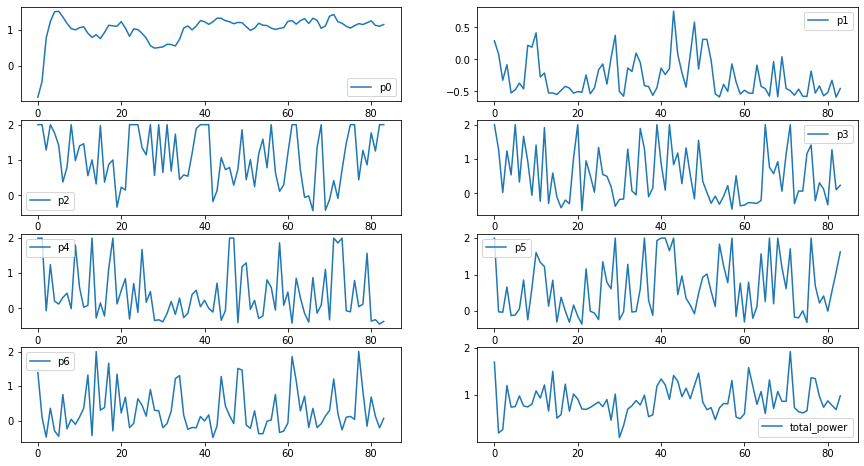

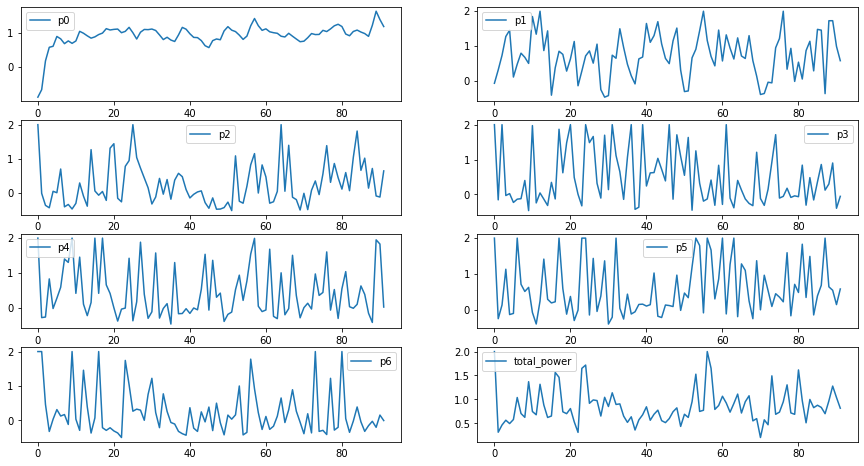

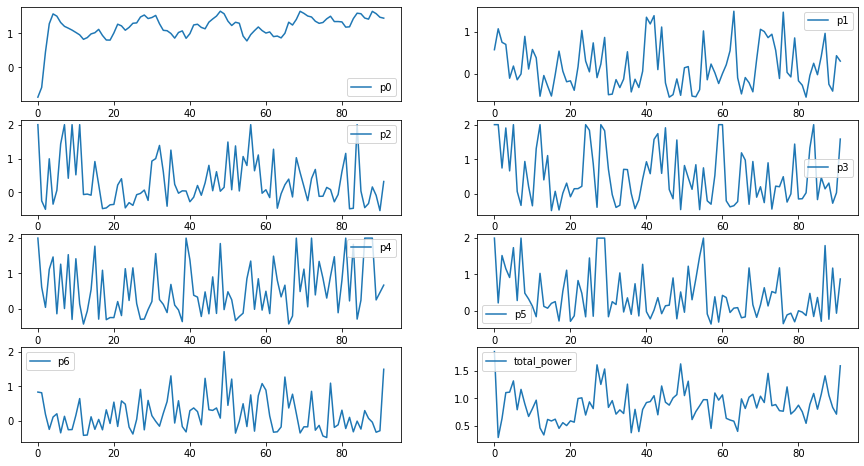

In [72]:
# import matplotlib.pyplot as plt

# def plot_power_simple(df):
#     fig, axes = plt.subplots(nrows=4, ncols=2)
#     fig.set_figheight(8)
#     fig.set_figwidth(15)

#     df[["timestamp","p0"]].plot(ax=axes[0,0])
#     df[["timestamp","p1"]].plot(ax=axes[0,1])
#     df[["timestamp","p2"]].plot(ax=axes[1,0])
#     df[["timestamp","p3"]].plot(ax=axes[1,1])
#     df[["timestamp","p4"]].plot(ax=axes[2,0])
#     df[["timestamp","p5"]].plot(ax=axes[2,1])
#     df[["timestamp","p6"]].plot(ax=axes[3,0])
#     df[["timestamp","total_power"]].plot(ax=axes[3,1])
    
# [plot_power_simple(df) for df in df_final_power]

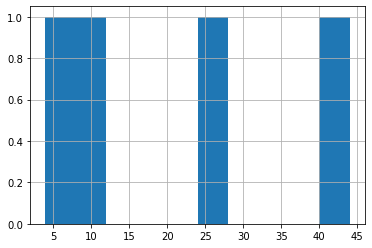

In [30]:
hist = value_counts_KMeans[0].hist()

In [37]:
# # df_unique_counts=pd.DataFrame(dict(l1=df_GMMS_c[0] , l2 = df_GMMS_c[1], l3=df_GMMS_c[2]))
# # df_unique_counts

# df_unique_GMM = pd.DataFrame({'a': df_GMMS_c[0]["pss_change"],'b':df_GMMS_c[1]["pss_change"],'c':df_GMMS_c[2]["pss_change"], 'idx_col':df_GMMS_c[2].index})
# df_unique_GMM
# # df_unique_GMM = pd.DataFrame(columns = ['l1', 'l2', 'l3'])
# # df_unique_GMM['l1']=df_GMMS_c[0]
# # df_unique_GMM['l2']=df_GMMS_c[1]
# # df_unique_GMM['l3']=df_GMMS_c[2]
# _unique_GMM

,a,b,c,idx_col
0,NaN,NaN,NaN,0
1,1.0,0.0,2.0,1
2,0.0,3.0,1.0,2
3,0.0,1.0,2.0,3
4,0.0,0.0,2.0,4
...,...,...,...,...
87,NaN,1.0,0.0,87
88,NaN,1.0,0.0,88
89,NaN,0.0,0.0,89
90,NaN,1.0,0.0,90
